In [1]:
import sys
sys.executable

'/home/pravyn/anaconda3/bin/python'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df = pd.read_csv('/home/pravyn/ai_workshop/workshop 5/train.csv')

In [4]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df = pd.read_csv('/home/pravyn/ai_workshop/workshop 5/test.csv')

In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
to_drop = ["PassengerId", "Name", "Ticket", "Fare", "Cabin"]
train2 = train_df.drop(to_drop, axis=1)

In [10]:
test2 = test_df.drop(to_drop,axis=1)

In [11]:
train2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [12]:
train2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.8+ KB


In [13]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [14]:
train2[train2["Embarked"].isnull()]  # check in which embarked is null

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
61,1,1,female,38.0,0,0,NaN
829,1,1,female,62.0,0,0,NaN


In [15]:
#fill with higest embarked
train2["Embarked"].mode()   #mode - higest frequency value of embarked

0    S
dtype: object

In [16]:
most_embarked = train2["Embarked"].mode()[0]
most_embarked

'S'

In [17]:
train2["Embarked"] = train2["Embarked"].fillna(most_embarked) # complete embarked with mode value of embark

In [21]:
train2[train2["Embarked"].isnull()] 

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [19]:
#function to fill Age
def fill_age(df):
    #Iterate over sex features
    for c in [1,2,3]:
        #Iterate over pclass feature values
        for s in ["male", "female"]:
            
            truth_table = (df["Sex"] == s) & (df["Pclass"] == c)
            print(truth_table)

            temp_df = df[truth_table]["Age"].dropna() #na values are dropped to calculate median
            median_age = temp_df.median()

            df.loc[(df.Age.isnull()) & (df.Sex == s)& (df.Pclass ==c),"Age"] = median_age
        
        

In [20]:
fill_age(train2)
fill_age(test2)


0      False
1      False
2      False
3      False
4      False
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23      True
24     False
25     False
26     False
27      True
28     False
29     False
       ...  
861    False
862    False
863    False
864    False
865    False
866    False
867     True
868    False
869    False
870    False
871    False
872     True
873    False
874    False
875    False
876    False
877    False
878    False
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889     True
890    False
Length: 891, dtype: bool
0      False
1       True
2      False
3       True
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11      True
12     False
13     False


In [22]:
# convert string values to numerical values
num_mapper = {
    "Embarked" : { 'C': 1,'S':2,'Q':3},
    "Sex" : { 'male': 1, 'female' : 2}
}
train2 = train2.replace(num_mapper)
test2 = test2.replace(num_mapper)


In [25]:
def show_corr(df):
    _, ax = plt.subplots(figsize=(8,6))
    # Colormap : Colors to denote correlation values 
    cmap = sns.diverging_palette(250,10, s=68, l=40, as_cmap=True)
    
    #Plotting heatmap using seaborn
    sns.heatmap(df.corr(),cmap=cmap,vmin=-1,vmax=1,annot=True)

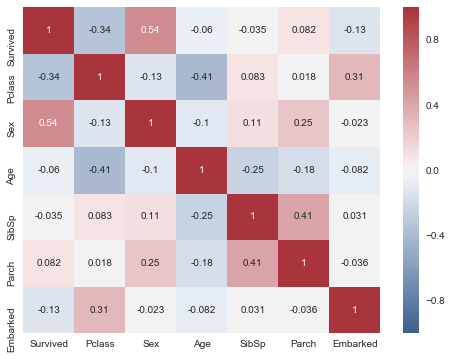

In [26]:
show_corr(train2)

In [27]:
train2_x = train2.drop(["Survived"], axis=1)
train2_y = train2["Survived"]

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
clf_rf = RandomForestClassifier(random_state = 12)
clf_rf.fit(train2_x,train2_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [33]:
clf_rf.score(train2_x,train2_y)

0.9259259259259259

In [38]:
from keras.models import Sequential
from keras.layers import Dense


In [39]:
trainx = train2_x.values

In [40]:
trainx

array([[ 3. ,  1. , 22. ,  1. ,  0. ,  2. ],
       [ 1. ,  2. , 38. ,  1. ,  0. ,  1. ],
       [ 3. ,  2. , 26. ,  0. ,  0. ,  2. ],
       ...,
       [ 3. ,  2. , 21.5,  1. ,  2. ,  2. ],
       [ 1. ,  1. , 26. ,  0. ,  0. ,  1. ],
       [ 3. ,  1. , 32. ,  0. ,  0. ,  3. ]])

In [41]:
trainy = train2_y.values

In [42]:
trainy

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [46]:
# nueral network model ko naam model bhanera define gareko
model = Sequential()
model.add(Dense(8,input_dim=6, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [47]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'] )
# adam is the improved version of gradient descent

In [48]:
# validation bhaneko model le nadekheko data
# 
history_object = model.fit(trainx,trainy, epochs = 40, batch_size = 40, verbose = 2, validation_split=0.1, shuffle=False)

Train on 801 samples, validate on 90 samples
Epoch 1/40
 - 0s - loss: 1.5825 - acc: 0.3883 - val_loss: 1.0884 - val_acc: 0.3444
Epoch 2/40
 - 0s - loss: 0.8840 - acc: 0.4482 - val_loss: 0.9163 - val_acc: 0.4889
Epoch 3/40
 - 0s - loss: 0.8380 - acc: 0.5069 - val_loss: 0.9065 - val_acc: 0.4778
Epoch 4/40
 - 0s - loss: 0.8211 - acc: 0.5031 - val_loss: 0.8858 - val_acc: 0.4889
Epoch 5/40
 - 0s - loss: 0.8066 - acc: 0.4869 - val_loss: 0.8689 - val_acc: 0.4778
Epoch 6/40
 - 0s - loss: 0.7944 - acc: 0.4931 - val_loss: 0.8520 - val_acc: 0.4778
Epoch 7/40
 - 0s - loss: 0.7818 - acc: 0.4981 - val_loss: 0.8351 - val_acc: 0.4778
Epoch 8/40
 - 0s - loss: 0.7692 - acc: 0.5056 - val_loss: 0.8182 - val_acc: 0.4778
Epoch 9/40
 - 0s - loss: 0.7568 - acc: 0.5094 - val_loss: 0.8019 - val_acc: 0.4778
Epoch 10/40
 - 0s - loss: 0.7448 - acc: 0.5106 - val_loss: 0.7859 - val_acc: 0.4889
Epoch 11/40
 - 0s - loss: 0.7332 - acc: 0.5218 - val_loss: 0.7704 - val_acc: 0.4889
Epoch 12/40
 - 0s - loss: 0.7220 - acc: 